In [1]:
import numpy as np
import astropy.units as u
from astropy.time import Time
import matplotlib.pyplot as plt
import huxt as H
import huxt_analysis as HA
import huxt_inputs as Hin

No initiation time specified. Defaulting to 1977-9-27
2.5364062499999998 d


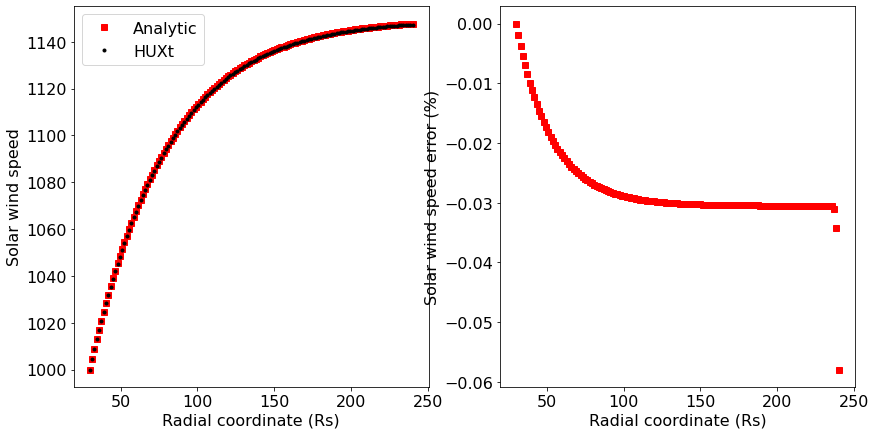

In [5]:
#Form longitudinal boundary conditions - background wind of 400 km/s with two fast streams.
v_boundary = np.ones(128) * 1000 * (u.km/u.s)

# Setup HUXt to do a 1 day simulation, with model output every 4 timesteps (roughly half and hour time step), looking at 0 longitude
model = H.HUXt(v_boundary=v_boundary, lon_out=0.0*u.deg, simtime=20*u.day, dt_scale=4)

# Solve these conditions, with no ConeCMEs added.
cme_list = []
model.solve(cme_list)

const = H.huxt_constants()
alpha  = const['alpha']
rh = const['r_accel']

v0 = model.v_boundary[0]
r = model.r
r0 = r[0]
v = v0 * (1 + alpha*(1 - np.exp((r0 - r)/rh)))

fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].plot(r, v, 'rs', label='Analytic')

id_t = 0
ax[0].plot(model.r, model.v_grid[id_t,:,0], 'k.', label='HUXt')

dv = 100*(model.v_grid[id_t,:,0] - v) / v

ax[1].plot(r, dv, 'rs', label='Analytic')

ax[0].set_ylabel('Solar wind speed')
ax[1].set_ylabel('Solar wind speed error (%)')
for a in ax:
    a.set_xlabel('Radial coordinate (Rs)')
    
ax[0].legend()

print(model.buffertime)


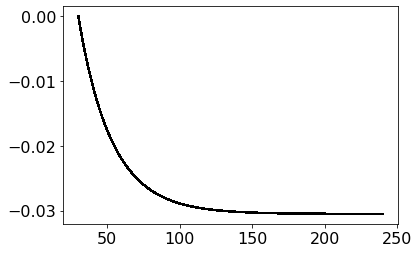

In [3]:
fig, ax = plt.subplots()
for i in range(model.v_grid.shape[0]):
    dv = 100*(model.v_grid[i,:,0] - v) / v
    ax.plot(r, dv, 'k-')
